# A Messy Notebook

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from sklearn.metrics import plot_confusion_matrix, recall_score, accuracy_score

In [75]:
survey = pd.read_csv('data/questionnaire.csv')

In [4]:
dems = pd.read_csv('data/demographic.csv')

In [47]:

dem_mask = ['DMDFMSIZ', 'DMDHHSZA', 'DMDHHSZB', 'DMDHHSZE', 'DMDHRGND', 'DMDHRAGE',
           'RIDRETH1', 'SEQN', 'SDDSRVYR', 'RIDSTATR', 'RIAGENDR', 'RIDAGEYR']

dems = dems[dem_mask]

In [28]:
diet = pd.read_csv('data/diet.csv')
diet.drop(labels=['DRD370T', 'DRD370TQ', 'DRD370U', 'DRD370UQ', 'DRD370V',
                 'DBD100', 'DR1SKY', 'DRQSDT1', 'DRQSDT2', 'DRQSDT3', 'DRQSDT4',
                 'DRQSDT5', 'DRQSDT6', 'DRQSDT7', 'DRQSDT8', 'DRQSDT9', 'DRQSDT10',
                 'DRQSDT11', 'DRQSDT12', 'DRQSDT91', 'DRD350A', 'DRD350AQ', 'DRD340',
                 'DRD350A', 'DRD350AQ', 'DRD350B', 'DRD350BQ', 'DRD350C', 'DRD350CQ', 
                 'DRD350D', 'DRD350DQ', 'DRD350E', 'DRD350EQ', 'DRD350F', 'DRD350FQ',
                 'DRD350G', 'DRD350GQ', 'DRD350H', 'DRD350HQ', 'DRD350I', 'DRD350IQ', 
                 'DRD350J', 'DRD350JQ', 'DRD350K', 'DRD360', 'DRD370A', 'DRD370AQ', 
                 'DRD370B', 'DRD370BQ', 'DRD370C', 'DRD370CQ', 'DRD370D','DRD370DQ', 
                 'DRD370E', 'DRD370EQ', 'DRD370F', 'DRD370FQ', 'DRD370G', 'DRD370GQ',
                 'DRD370H', 'DRD370HQ', 'DRD370I', 'DRD370IQ', 'DRD370J', 'DRD370JQ',
                 'DRD370K', 'DRD370KQ', 'DRD370L', 'DRD370LQ', 'DRD370M', 'DRD370MQ',
                 'DRD370N', 'DRD370NQ', 'DRD370O', 'DRD370OQ', 'DRD370P', 'DRD370PQ', 
                 'DRD370Q', 'DRD370QQ', 'DRD370R', 'DRD370RQ', 'DRD370S', 'DRD370SQ'],
         axis=1,
         inplace=True)


In [41]:
exam = pd.read_csv('data/examination.csv')

In [42]:
exam_mask = ['BMDSTATS', 'BMXWT', 'PEASCST1', 'SEQN']

exam = exam[exam_mask]


In [39]:
labs = pd.read_csv('data/labs.csv')

In [40]:

lab_mask = ['URXUMA', 'URXUMS', 'URXUCR.x', 'URXCRS', 'URDACT', 'SEQN']

labs = labs[lab_mask]

In [48]:
meds = pd.read_csv('data/medications.csv')

In [49]:
meds = meds[['SEQN', 'RXDUSE', 'RXDDRUG']]

In [50]:
dem_diet = dems.join(diet, on='SEQN', rsuffix='diet_')

In [59]:
dem_diet.isna().sum()

DMDFMSIZ         0
DMDHHSZA         0
DMDHHSZB         0
DMDHHSZE         0
DMDHRGND         0
DMDHRAGE         0
RIDRETH1         0
SEQN             0
SDDSRVYR         0
RIDSTATR         0
RIAGENDR         0
RIDAGEYR         0
SEQNdiet_    10175
WTDRD1       10175
WTDR2D       10175
DR1DRSTZ     10175
DR1EXMER     10175
DRABF        10175
DRDINT       10175
DR1DBIH      10175
DR1DAY       10175
DR1LANG      10175
DR1MNRSP     10175
DR1HELPD     10175
DBQ095Z      10175
DRQSPREP     10175
DR1STY       10175
DRQSDIET     10175
DR1TNUMF     10175
DR1TKCAL     10175
DR1TPROT     10175
DR1TCARB     10175
DR1TSUGR     10175
DR1TFIBE     10175
DR1TTFAT     10175
DR1TSFAT     10175
DR1TMFAT     10175
DR1TPFAT     10175
DR1TCHOL     10175
DR1TATOC     10175
DR1TATOA     10175
DR1TRET      10175
DR1TVARA     10175
DR1TACAR     10175
DR1TBCAR     10175
DR1TCRYP     10175
DR1TLYCO     10175
DR1TLZ       10175
DR1TVB1      10175
DR1TVB2      10175
DR1TNIAC     10175
DR1TVB6      10175
DR1TFOLA    

In [60]:
dd_e = dems.join(exam, on='SEQN', rsuffix='exam_')

In [61]:
dde_lab = dd_e.join(labs, on='SEQN', rsuffix='lab_')

In [62]:
dde_lab.isna().sum()

DMDFMSIZ         0
DMDHHSZA         0
DMDHHSZB         0
DMDHHSZE         0
DMDHRGND         0
DMDHRAGE         0
RIDRETH1         0
SEQN             0
SDDSRVYR         0
RIDSTATR         0
RIAGENDR         0
RIDAGEYR         0
BMDSTATS     10175
BMXWT        10175
PEASCST1     10175
SEQNexam_    10175
URXUMA       10175
URXUMS       10175
URXUCR.x     10175
URXCRS       10175
URDACT       10175
SEQNlab_     10175
dtype: int64

In [63]:
data = dd_e.join(meds, on='SEQN', rsuffix='med_')

In [64]:
len(data)

10175

<AxesSubplot:xlabel='RIDAGEYR', ylabel='Count'>

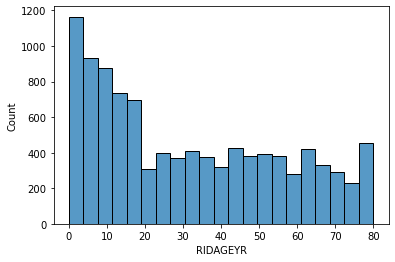

In [68]:
sns.histplot(data.RIDAGEYR)

In [70]:
data.RIAGENDR.value_counts()

2    5172
1    5003
Name: RIAGENDR, dtype: int64

In [71]:
data.RIDSTATR.value_counts()

2    9813
1     362
Name: RIDSTATR, dtype: int64

In [73]:
meds.isna().sum()

SEQN          0
RXDUSE        0
RXDDRUG    6094
dtype: int64

In [74]:
meds.RXDUSE.value_counts()

1    14100
2     6089
7        4
9        1
Name: RXDUSE, dtype: int64

In [78]:
survey_mask = ['DLQ010', 'DLQ020', 'DBD905', 'DBD910', 'DBQ197', 'DIQ050', 'DUQ200', 'DIQ050']
data = survey[survey_mask]

In [81]:
data.dropna(inplace=True)

<ipython-input-81-f1116dacf2bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [86]:
# engineer target - DUQ200 - DRUG USE question
# 1 = no drug use
# !1 = drug use
y = np.where(data['DUQ200']==1, 0, 1)

In [89]:
X = data.drop(labels='DUQ200', axis=1)

In [95]:
X.DBD905 = np.where(X.DBD905==0, 0, 1)
X.DBD910 = np.where(X.DBD910==0, 0, 1)

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [93]:
data.head()

,DLQ010,DLQ020,DBD905,DBD910,DBQ197,DIQ050,DUQ200,DIQ050
1,2.0,2.0,0.0,2.0,3.0,1.0,1.0,1.0
5,1.0,1.0,0.0,0.0,0.0,2.0,1.0,2.0
9,2.0,2.0,0.0,0.0,3.0,2.0,1.0,2.0
11,2.0,2.0,0.0,0.0,0.0,2.0,2.0,2.0
17,2.0,2.0,0.0,0.0,3.0,2.0,2.0,2.0


In [94]:
for col in data.columns:
    print(col, '\n\n', data[col].value_counts(),'\n\n')

DLQ010 

 2.0    3561
1.0     120
Name: DLQ010, dtype: int64 


DLQ020 

 2.0    3520
1.0     160
9.0       1
Name: DLQ020, dtype: int64 


DBD905 

 0.0       2493
1.0        282
2.0        273
4.0        111
5.0        105
3.0        103
10.0        58
8.0         46
30.0        32
12.0        30
15.0        26
6.0         25
7.0         20
21.0        13
60.0        11
20.0         9
17.0         6
150.0        5
25.0         5
90.0         4
9.0          3
9999.0       3
40.0         2
14.0         2
13.0         2
180.0        2
18.0         2
120.0        2
26.0         1
42.0         1
34.0         1
16.0         1
35.0         1
11.0         1
Name: DBD905, dtype: int64 


DBD910 

 0.0       2219
1.0        346
2.0        258
4.0        165
3.0        137
5.0        107
10.0        89
8.0         64
30.0        52
15.0        45
6.0         40
12.0        33
20.0        29
7.0         28
17.0        12
21.0        12
60.0         9
14.0         8
16.0         7
25.0         5


ValueError: Grouper for 'DIQ050' not 1-dimensional

In [98]:
ohe = OneHotEncoder(sparse=False)

X_tr_ohe = pd.DataFrame(ohe.fit_transform(X_train), columns=ohe.get_feature_names())
X_te_ohe = pd.DataFrame(ohe.transform(X_test), columns=ohe.get_feature_names())

In [99]:
lr = LogisticRegression()

lr.fit(X_tr_ohe, y_train)

LogisticRegression()

In [110]:
tr_preds = lr.predict(X_tr_ohe)

In [104]:
preds = lr.predict(X_te_ohe)

In [108]:
# test data
accuracy_score(y_test, preds)

0.5461454940282302

In [105]:
# test data
recall_score(y_test, preds)

0.3864168618266979

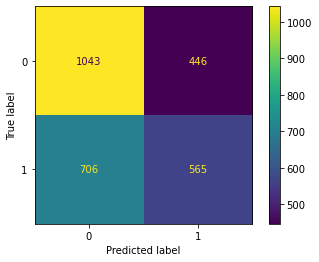

In [109]:
# train data
plot_confusion_matrix(lr, X_tr_ohe, y_train)

In [111]:
accuracy_score(y_train, tr_preds)

0.5826086956521739

In [112]:
recall_score(y_train, tr_preds)

0.44453186467348543

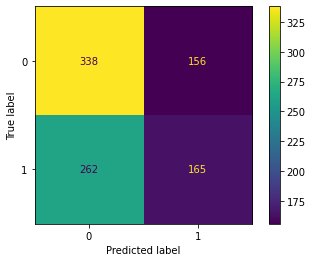

In [106]:
# test data
plot_confusion_matrix(lr, X_te_ohe, y_test)